In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [137]:
july_data = pd.read_csv("wind distribution/Btn_met202203 - Btn_met202203.csv")

In [138]:
july = july_data[july_data["Wind (m/s)"] <= 360]

In [139]:
# x going west to east, y going south to north
july["x_speed"] = july["Wind (m/s)"]*np.sin(july["Wind Dir (deg)"] * np.pi / 180)
july["y_speed"] = july["Wind (m/s)"]*np.cos(july["Wind Dir (deg)"] * np.pi / 180)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\55377669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july["x_speed"] = july["Wind (m/s)"]*np.sin(july["Wind Dir (deg)"] * np.pi / 180)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\55377669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july["y_speed"] = july["Wind (m/s)"]*np.cos(july["Wind Dir (deg)"] * np.pi / 180)


In [140]:
mean_x_speed = july["x_speed"].mean()
mean_y_speed = july["y_speed"].mean()
print(mean_x_speed)
print(mean_y_speed)
july_atan2_direction = np.arctan(mean_y_speed/mean_x_speed)*180/np.pi


1.9176809395838248
0.5839370708602059


In [141]:
print(july_atan2_direction)

16.935580674073098


In [142]:
def actual_direction(dir):
    if dir >180:
        dir -= 180
    elif dir < 180:
        dir += 180
    return dir*np.pi/180

In [143]:
new_dir =actual_direction(july_atan2_direction)

In [144]:
print(new_dir)

3.437174297089489


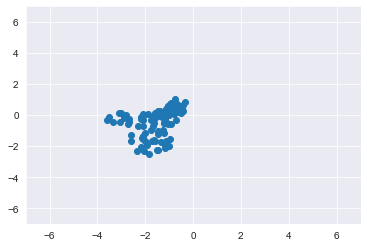

In [145]:
import matplotlib.pyplot as plt

r = np.array([[np.cos(new_dir),- np.sin(new_dir)],[np.sin(new_dir),np.cos(new_dir)]])

rotated = np.transpose(r @ np.transpose(july[["x_speed","y_speed"]]))
x_transformed = rotated[0]
y_transformed = rotated[1]
# july["transformed_y_speed"] = july["Wind (m/s)"]*np.sin((july["Wind Dir (deg)"] - new_dir)*np.pi/180)
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.scatter(x_transformed[0:100],y_transformed[0:100])


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='0'>

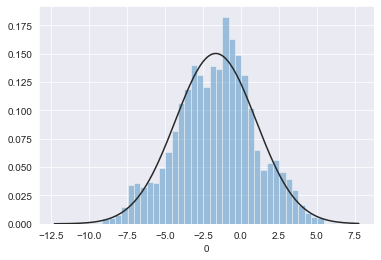

In [146]:
sns.distplot(x_transformed, fit=norm, kde=False)

In [147]:
mean,std=norm.fit(x_transformed)

In [148]:
print(mean, std)

-1.6644179086953361 2.658083763664506


In [149]:
print(mean)
print(std)

-1.6644179086953361
2.658083763664506


These results are good. Since y is the direction of prevailing wind, x should be roughly mean zero, and it looks like the normal distribution fits it fairly well.

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1'>

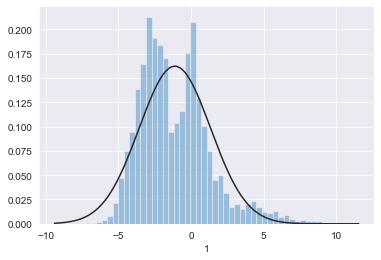

In [150]:
sns.distplot(y_transformed, fit=norm, kde=False)